In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm, trange
import seaborn as sns

# set sns and plt themes to black 
sns.set_theme()


In [6]:
# Load the data
df = pd.read_csv('obj function compare 2pct.csv')
print(f'Unique ObjFun: {df["ObjFun"].unique()}')
print(df.groupby('ObjFun').count().iloc[:, 0])

df.head()

Unique ObjFun: ['CVaR 2%' 'VaR 2%' 'Mean-Std 2%']
ObjFun
CVaR 2%        64
Mean-Std 2%    34
VaR 2%         64
Name: pnl mean, dtype: int64


,ObjFun,pnl mean,std,Mean-SD,gamma-ratio,vega-ratio,var95,cvar95,E[TC]
0,CVaR 2%,-0.701012,0.794329,-2.007684,0.527333,0.742684,-1.539370,-2.143776,-0.923191
1,CVaR 2%,-0.701037,0.794308,-2.007674,0.527333,0.742684,-1.539370,-2.143780,-0.923196
2,CVaR 2%,-0.935955,0.487840,-1.738452,0.744420,0.718585,-1.711921,-1.998173,-1.009414
3,CVaR 2%,-0.701012,0.794329,-2.007684,0.527333,0.742684,-1.539370,-2.143776,-0.923191
4,CVaR 2%,-0.764656,0.651980,-1.837162,0.541721,0.764599,-1.618287,-2.215421,-0.956501


# Compare the distibution of the PnL for different objective functions

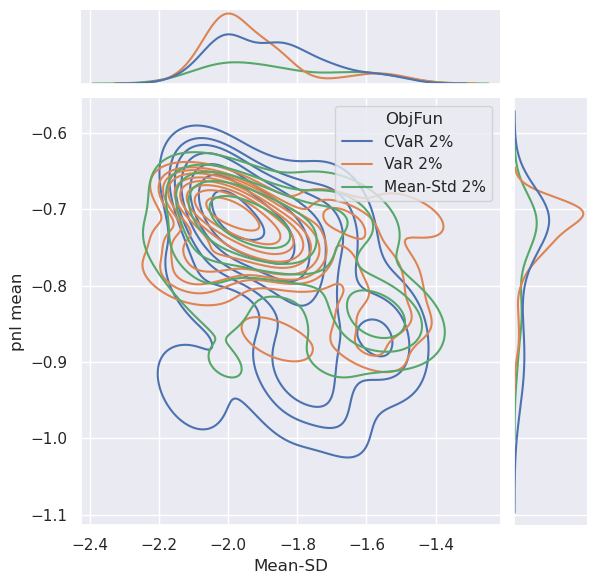

In [7]:
sns.jointplot(data=df, x="Mean-SD", y="pnl mean", hue="ObjFun", kind='kde') ; plt.show()

# Top 5 performers from each objective function

In [8]:
# Concatenate the DataFrames
combined_df = pd.concat([
    df.query('ObjFun == "Mean-Std 2%"').sort_values('Mean-SD', ascending=False).head(6).reset_index(drop=True),
    df.query('ObjFun == "VaR 2%"').sort_values('var95', ascending=False).head(6).reset_index(drop=True),
    df.query('ObjFun == "CVaR 2%"').sort_values('cvar95', ascending=False).head(6).reset_index(drop=True)
]).reset_index(names=['order'])

combined_df['order'] = combined_df['order'].astype(str)

# Apply background gradient coloring to each column
styled_df = combined_df.style.background_gradient(cmap='RdYlGn', axis=0)

# Display the styled DataFrame
styled_df

,order,ObjFun,pnl mean,std,Mean-SD,gamma-ratio,vega-ratio,var95,cvar95,E[TC]
0,0,Mean-Std 2%,-0.826285,0.418901,-1.515378,0.707205,0.805683,-1.435004,-1.634473,-0.874596
1,1,Mean-Std 2%,-0.839583,0.418451,-1.527935,0.701553,0.798553,-1.455937,-1.660906,-0.916754
2,2,Mean-Std 2%,-0.845728,0.442810,-1.574150,0.706443,0.791208,-1.459383,-1.693714,-0.891861
3,3,Mean-Std 2%,-0.814257,0.470484,-1.588204,0.706114,0.806671,-1.423194,-1.796261,-0.878933
4,4,Mean-Std 2%,-0.861169,0.445502,-1.594019,0.705513,0.761789,-1.518676,-1.748165,-0.943487
5,5,Mean-Std 2%,-0.846599,0.467749,-1.616047,0.610408,0.695548,-1.544803,-1.892416,-0.891872
6,0,VaR 2%,-0.708001,0.467220,-1.476578,0.585407,0.784560,-1.344360,-1.516164,-0.861477
7,1,VaR 2%,-0.832855,0.417214,-1.519171,0.708292,0.800979,-1.431163,-1.625768,-0.892141
8,2,VaR 2%,-0.760987,0.487717,-1.563282,0.615978,0.790919,-1.442823,-1.645603,-0.902532
9,3,VaR 2%,-0.793585,0.460086,-1.550426,0.648544,0.742800,-1.457101,-1.676176,-0.891436


In [9]:
combined_df.drop(columns=['order']).groupby('ObjFun').mean().style.background_gradient(cmap='RdYlGn', axis=0)

,pnl mean,std,Mean-SD,gamma-ratio,vega-ratio,var95,cvar95,E[TC]
ObjFun,,,,,,,,
CVaR 2%,-0.839306,0.446259,-1.573403,0.675677,0.788310,-1.467226,-1.732444,-0.916015
Mean-Std 2%,-0.838937,0.443983,-1.569289,0.689539,0.776576,-1.472833,-1.737656,-0.899584
VaR 2%,-0.783658,0.509413,-1.621642,0.633882,0.777542,-1.442863,-1.800858,-0.905046


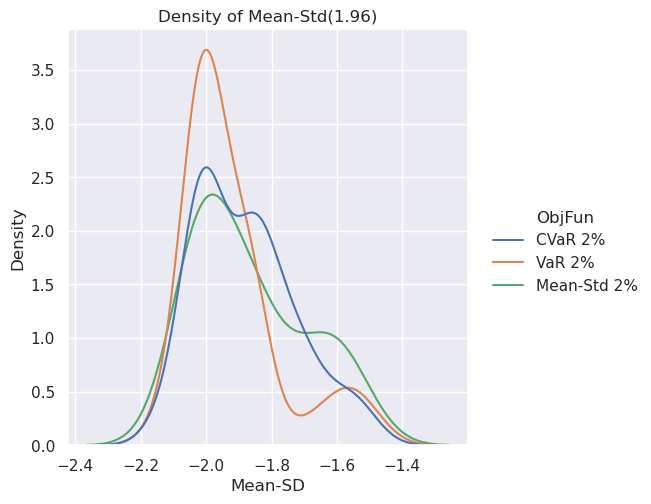

,order,ObjFun,pnl mean,std,Mean-SD,gamma-ratio,vega-ratio,var95,cvar95,E[TC]
6,0,VaR 2%,-0.708001,0.467220,-1.476578,0.585407,0.784560,-1.344360,-1.516164,-0.861477
12,0,CVaR 2%,-0.826622,0.412785,-1.505653,0.715990,0.802456,-1.432050,-1.636564,-0.887561
7,1,VaR 2%,-0.832855,0.417214,-1.519171,0.708292,0.800979,-1.431163,-1.625768,-0.892141
0,0,Mean-Std 2%,-0.839583,0.418451,-1.527935,0.701553,0.798553,-1.455937,-1.660906,-0.916754
13,1,CVaR 2%,-0.866552,0.413491,-1.546744,0.715162,0.775194,-1.485185,-1.687320,-0.910329
9,3,VaR 2%,-0.793585,0.460086,-1.550426,0.648544,0.742800,-1.457101,-1.676176,-0.891436
14,2,CVaR 2%,-0.872333,0.415635,-1.556053,0.724706,0.763891,-1.485589,-1.699012,-0.910961
15,3,CVaR 2%,-0.873868,0.418408,-1.562149,0.709884,0.745236,-1.492462,-1.708635,-0.901708
8,2,VaR 2%,-0.760987,0.487717,-1.563282,0.615978,0.790919,-1.442823,-1.645603,-0.902532
11,5,VaR 2%,-0.851129,0.439802,-1.574604,0.709643,0.761409,-1.496558,-1.706769,-0.937097


In [140]:
sns.displot(data=df, x="Mean-SD", hue="ObjFun", kind="kde", common_norm=False) ; plt.title('Density of Mean-Std(1.96)') ; plt.show()
combined_df.sort_values('Mean-SD', ascending=False).style.background_gradient(cmap='RdYlGn', axis=0, subset=['Mean-SD'])

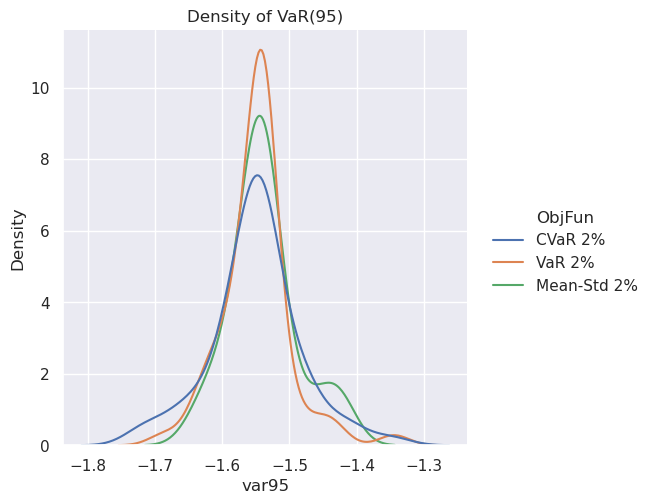

,order,ObjFun,pnl mean,std,Mean-SD,gamma-ratio,vega-ratio,var95,cvar95,E[TC]
6,0,VaR 2%,-0.708001,0.467220,-1.476578,0.585407,0.784560,-1.344360,-1.516164,-0.861477
17,5,CVaR 2%,-0.683982,0.595896,-1.664230,0.524030,0.805087,-1.349056,-1.886633,-0.889983
1,1,Mean-Std 2%,-0.814257,0.470484,-1.588204,0.706114,0.806671,-1.423194,-1.796261,-0.878933
7,1,VaR 2%,-0.832855,0.417214,-1.519171,0.708292,0.800979,-1.431163,-1.625768,-0.892141
12,0,CVaR 2%,-0.826622,0.412785,-1.505653,0.715990,0.802456,-1.432050,-1.636564,-0.887561
8,2,VaR 2%,-0.760987,0.487717,-1.563282,0.615978,0.790919,-1.442823,-1.645603,-0.902532
0,0,Mean-Std 2%,-0.839583,0.418451,-1.527935,0.701553,0.798553,-1.455937,-1.660906,-0.916754
9,3,VaR 2%,-0.793585,0.460086,-1.550426,0.648544,0.742800,-1.457101,-1.676176,-0.891436
10,4,VaR 2%,-0.755389,0.784438,-2.045789,0.535426,0.784582,-1.485176,-2.634667,-0.945593
13,1,CVaR 2%,-0.866552,0.413491,-1.546744,0.715162,0.775194,-1.485185,-1.687320,-0.910329


In [139]:
sns.displot(data=df, x="var95", hue="ObjFun", kind="kde", common_norm=False) ; plt.title('Density of VaR(95)') ; plt.show()
combined_df.sort_values('var95', ascending=False).style.background_gradient(cmap='RdYlGn', axis=0, subset=['var95'])

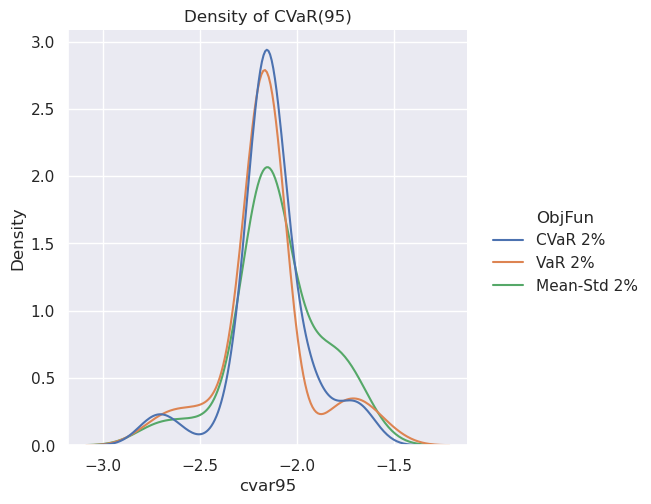

,order,ObjFun,pnl mean,std,Mean-SD,gamma-ratio,vega-ratio,var95,cvar95,E[TC]
6,0,VaR 2%,-0.708001,0.467220,-1.476578,0.585407,0.784560,-1.344360,-1.516164,-0.861477
7,1,VaR 2%,-0.832855,0.417214,-1.519171,0.708292,0.800979,-1.431163,-1.625768,-0.892141
12,0,CVaR 2%,-0.826622,0.412785,-1.505653,0.715990,0.802456,-1.432050,-1.636564,-0.887561
8,2,VaR 2%,-0.760987,0.487717,-1.563282,0.615978,0.790919,-1.442823,-1.645603,-0.902532
0,0,Mean-Std 2%,-0.839583,0.418451,-1.527935,0.701553,0.798553,-1.455937,-1.660906,-0.916754
9,3,VaR 2%,-0.793585,0.460086,-1.550426,0.648544,0.742800,-1.457101,-1.676176,-0.891436
13,1,CVaR 2%,-0.866552,0.413491,-1.546744,0.715162,0.775194,-1.485185,-1.687320,-0.910329
14,2,CVaR 2%,-0.872333,0.415635,-1.556053,0.724706,0.763891,-1.485589,-1.699012,-0.910961
11,5,VaR 2%,-0.851129,0.439802,-1.574604,0.709643,0.761409,-1.496558,-1.706769,-0.937097
15,3,CVaR 2%,-0.873868,0.418408,-1.562149,0.709884,0.745236,-1.492462,-1.708635,-0.901708


In [141]:
sns.displot(data=df, x="cvar95", hue="ObjFun", kind="kde", common_norm=False) ; plt.title('Density of CVaR(95)') ; plt.show()
combined_df.sort_values('cvar95', ascending=False).style.background_gradient(cmap='RdYlGn', axis=0, subset=['cvar95'])

----------------------------
# Profit Distribution per Objective Functions

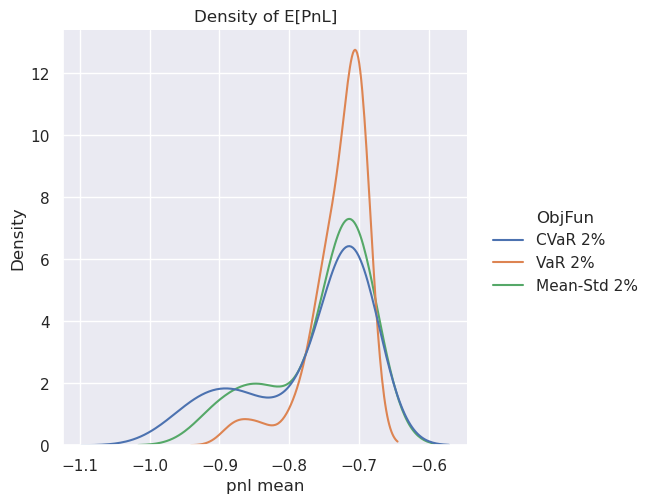

,order,ObjFun,pnl mean,std,Mean-SD,gamma-ratio,vega-ratio,var95,cvar95,E[TC]
17,5,CVaR 2%,-0.683982,0.595896,-1.664230,0.524030,0.805087,-1.349056,-1.886633,-0.889983
6,0,VaR 2%,-0.708001,0.467220,-1.476578,0.585407,0.784560,-1.344360,-1.516164,-0.861477
4,4,Mean-Std 2%,-0.708493,0.571311,-1.648300,0.542854,0.744692,-1.490497,-1.774027,-0.907161
10,4,VaR 2%,-0.755389,0.784438,-2.045789,0.535426,0.784582,-1.485176,-2.634667,-0.945593
8,2,VaR 2%,-0.760987,0.487717,-1.563282,0.615978,0.790919,-1.442823,-1.645603,-0.902532
9,3,VaR 2%,-0.793585,0.460086,-1.550426,0.648544,0.742800,-1.457101,-1.676176,-0.891436
1,1,Mean-Std 2%,-0.814257,0.470484,-1.588204,0.706114,0.806671,-1.423194,-1.796261,-0.878933
12,0,CVaR 2%,-0.826622,0.412785,-1.505653,0.715990,0.802456,-1.432050,-1.636564,-0.887561
7,1,VaR 2%,-0.832855,0.417214,-1.519171,0.708292,0.800979,-1.431163,-1.625768,-0.892141
0,0,Mean-Std 2%,-0.839583,0.418451,-1.527935,0.701553,0.798553,-1.455937,-1.660906,-0.916754


In [143]:
sns.displot(data=df, x="pnl mean", hue="ObjFun", kind="kde", common_norm=False) ; plt.title('Density of E[PnL]') ; plt.show()
combined_df.sort_values('pnl mean', ascending=False).style.background_gradient(cmap='RdYlGn', axis=0, subset=['pnl mean'])

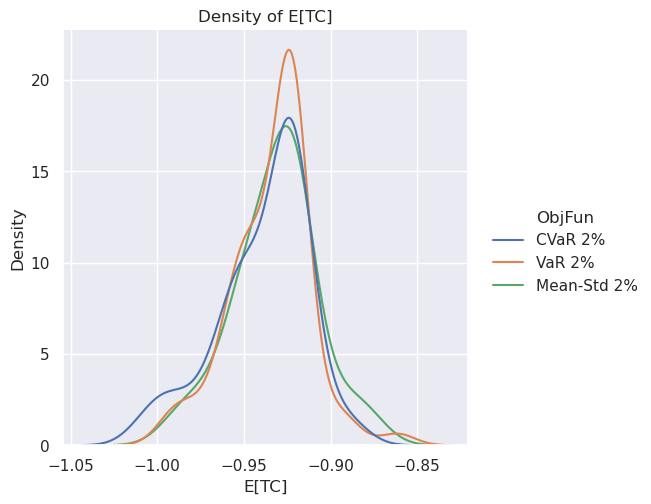

,order,ObjFun,pnl mean,std,Mean-SD,gamma-ratio,vega-ratio,var95,cvar95,E[TC]
17,5,CVaR 2%,-0.683982,0.595896,-1.664230,0.524030,0.805087,-1.349056,-1.886633,-0.889983
6,0,VaR 2%,-0.708001,0.467220,-1.476578,0.585407,0.784560,-1.344360,-1.516164,-0.861477
4,4,Mean-Std 2%,-0.708493,0.571311,-1.648300,0.542854,0.744692,-1.490497,-1.774027,-0.907161
10,4,VaR 2%,-0.755389,0.784438,-2.045789,0.535426,0.784582,-1.485176,-2.634667,-0.945593
8,2,VaR 2%,-0.760987,0.487717,-1.563282,0.615978,0.790919,-1.442823,-1.645603,-0.902532
9,3,VaR 2%,-0.793585,0.460086,-1.550426,0.648544,0.742800,-1.457101,-1.676176,-0.891436
1,1,Mean-Std 2%,-0.814257,0.470484,-1.588204,0.706114,0.806671,-1.423194,-1.796261,-0.878933
12,0,CVaR 2%,-0.826622,0.412785,-1.505653,0.715990,0.802456,-1.432050,-1.636564,-0.887561
7,1,VaR 2%,-0.832855,0.417214,-1.519171,0.708292,0.800979,-1.431163,-1.625768,-0.892141
0,0,Mean-Std 2%,-0.839583,0.418451,-1.527935,0.701553,0.798553,-1.455937,-1.660906,-0.916754


In [144]:
sns.displot(data=df, x="E[TC]", hue="ObjFun", kind="kde", common_norm=False) ; plt.title('Density of E[TC]') ; plt.show()
combined_df.sort_values('pnl mean', ascending=False).style.background_gradient(cmap='RdYlGn', axis=0, subset=['pnl mean'])

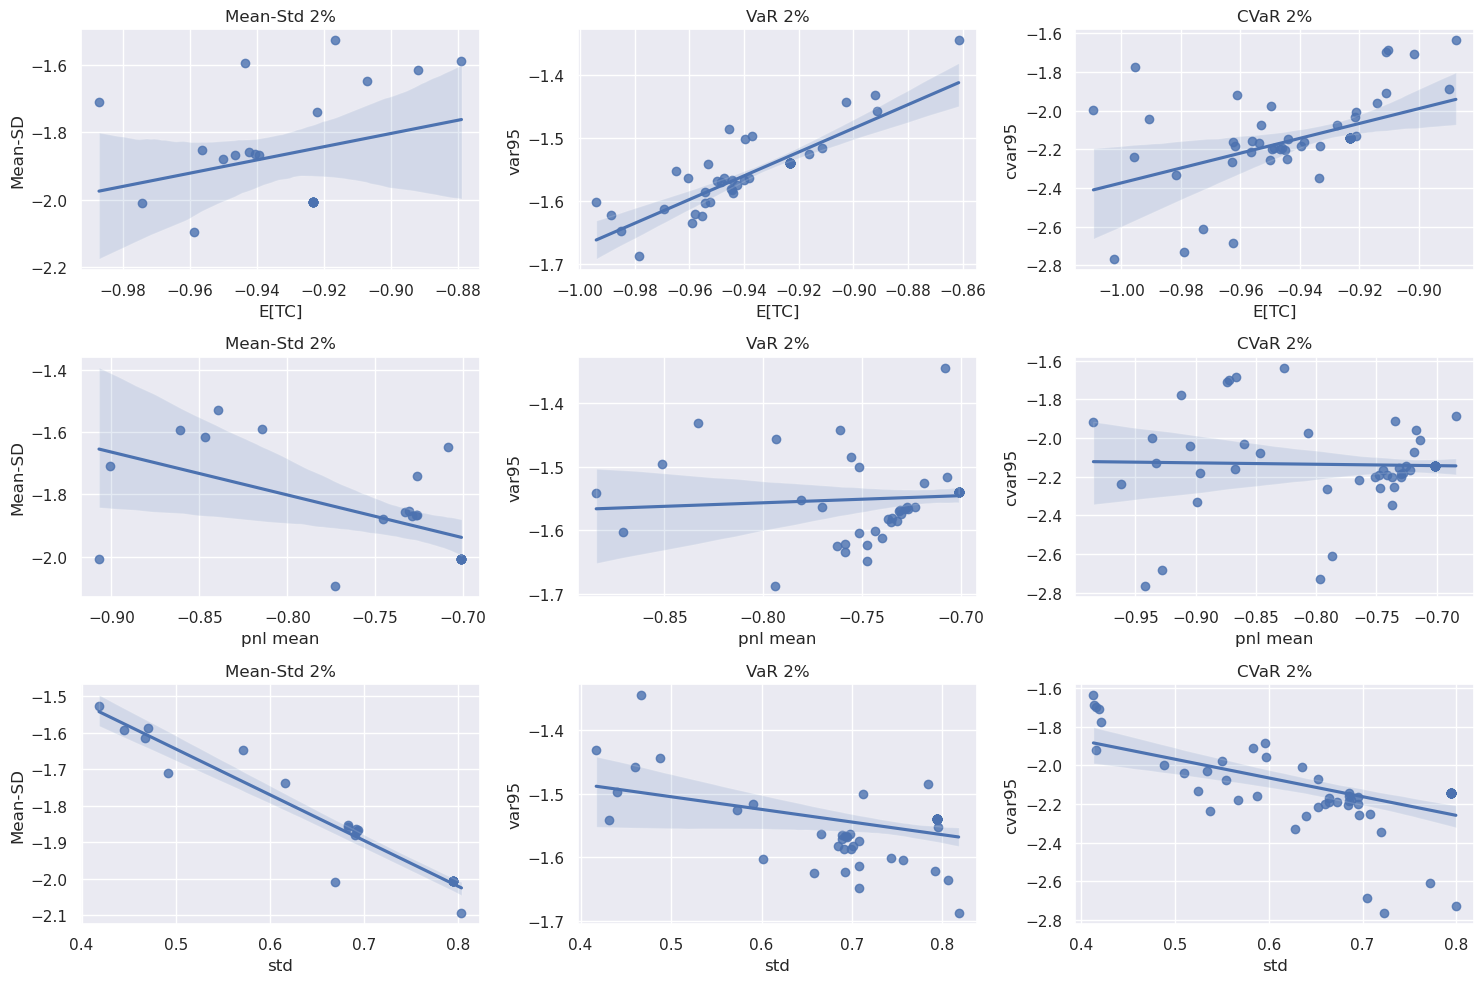

In [137]:
# plt with 3 fitured row
fig, ax = plt.subplots(3, 3, figsize=(15, 10))

sns.regplot(data=df.query("ObjFun == 'Mean-Std 2%'"), x="E[TC]", y="Mean-SD", ax=ax[0,0])
sns.regplot(data=df.query("ObjFun == 'VaR 2%'"), x="E[TC]", y="var95", ax=ax[0,1])
sns.regplot(data=df.query("ObjFun == 'CVaR 2%'"), x="E[TC]", y="cvar95", ax=ax[0,2])
# titles
ax[0,0].set_title('Mean-Std 2%')
ax[0,1].set_title('VaR 2%')
ax[0,2].set_title('CVaR 2%')

sns.regplot(data=df.query("ObjFun == 'Mean-Std 2%'"), x="pnl mean", y="Mean-SD", ax=ax[1,0])
sns.regplot(data=df.query("ObjFun == 'VaR 2%'"), x="pnl mean", y="var95", ax=ax[1,1])
sns.regplot(data=df.query("ObjFun == 'CVaR 2%'"), x="pnl mean", y="cvar95", ax=ax[1,2])
# titles
ax[1,0].set_title('Mean-Std 2%')
ax[1,1].set_title('VaR 2%')
ax[1,2].set_title('CVaR 2%')

sns.regplot(data=df.query("ObjFun == 'Mean-Std 2%'"), x="std", y="Mean-SD", ax=ax[2,0])
sns.regplot(data=df.query("ObjFun == 'VaR 2%'"), x="std", y="var95", ax=ax[2,1])
sns.regplot(data=df.query("ObjFun == 'CVaR 2%'"), x="std", y="cvar95", ax=ax[2,2])
# titles
ax[2,0].set_title('Mean-Std 2%')
ax[2,1].set_title('VaR 2%')
ax[2,2].set_title('CVaR 2%')

plt.tight_layout()

--------------------------------
# ANOVA

In [11]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [32]:
df.query('ObjFun == "Mean-Std 2%"')['Mean-SD'].quantile(.5)

-1.8678687992907737

Group: Mean-Std 2%, Shapiro-Wilk p-value: 0.02767013060980923
Group: VaR 2%, Shapiro-Wilk p-value: 0.008598811110509964
Group: CVaR 2%, Shapiro-Wilk p-value: 1.0656343142941512e-05

Levene's Test p-value: 0.12972741441721566

             sum_sq    df         F    PR(>F)
C(ObjFun)  0.179938   2.0  1.791014  0.176382
Residual   2.762843  55.0       NaN       NaN

   Source  ddof1      ddof2         F     p-unc       np2
0  ObjFun      2  17.132848  1.451015  0.261728  0.061145

Kruskal-Wallis Test p-value: 0.1114678130823815

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
    CVaR 2% Mean-Std 2%   0.0861 0.4123 -0.0759 0.2481  False
    CVaR 2%      VaR 2%   0.1432 0.2169 -0.0605 0.3469  False
Mean-Std 2%      VaR 2%   0.0571  0.811 -0.1655 0.2796  False
-------------------------------------------------------------

             A            B   mean

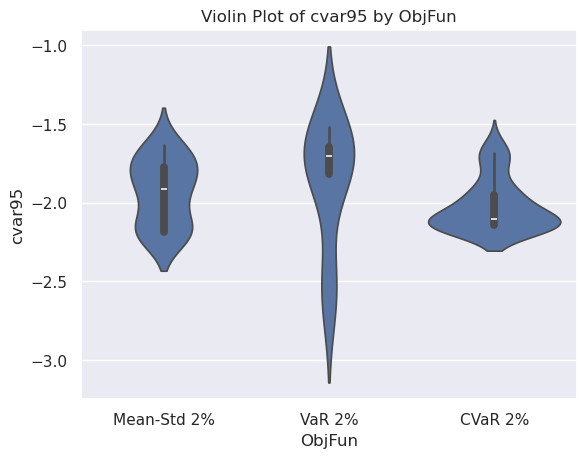

In [ ]:
df = pd.read_csv('obj function compare 2pct.csv')

# ==============================================================================
# Top 10 rows for each group

_MV = df.query('ObjFun == "Mean-Std 2%"')['Mean-SD'].quantile(.5)
_V = df.query('ObjFun == "VaR 2%"')['var95'].quantile(.5)
_C = df.query('ObjFun == "CVaR 2%"')['cvar95'].quantile(.5)

combined_df = pd.concat([
    df.query('ObjFun == "Mean-Std 2%" & `Mean-SD` > @_MV').sort_values('Mean-SD', ascending=False),
    df.query('ObjFun == "VaR 2%" & var95 > @_V').sort_values('var95', ascending=False),
    df.query('ObjFun == "CVaR 2%" & cvar95 > @_C').sort_values('cvar95', ascending=False)
])

_df = df.copy()
_df = combined_df
# ==============================================================================

target_var = 'cvar95'

# Shapiro-Wilk Test for each group
for group in _df['ObjFun'].unique():
    stat, p = stats.shapiro(_df[_df['ObjFun'] == group][target_var])
    print(f'Group: {group}, Shapiro-Wilk p-value: {p}')

print()
# Levene's Test
stat, p = stats.levene(
    _df[_df['ObjFun'] == 'CVaR 2%'][target_var],
    _df[_df['ObjFun'] == 'VaR 2%'][target_var],
    _df[_df['ObjFun'] == 'Mean-Std 2%'][target_var]
)
print(f"Levene's Test p-value: {p}")

print()
# Using statsmodels for ANOVA
model = ols("Q(target_var) ~ C(ObjFun)", data=_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

print()
# Welch's ANOVA using pingouin
import pingouin as pg
welch_anova = pg.welch_anova(dv=target_var, between='ObjFun', data=_df)
print(welch_anova)

print()
# Kruskal-Wallis Test
stat, p = stats.kruskal(
    _df[_df['ObjFun'] == 'CVaR 2%'][target_var],
    _df[_df['ObjFun'] == 'VaR 2%'][target_var],
    _df[_df['ObjFun'] == 'Mean-Std 2%'][target_var]
)
print(f"Kruskal-Wallis Test p-value: {p}")

print()
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey's HSD Test
tukey = pairwise_tukeyhsd(
    endog=_df[target_var],
    groups=_df['ObjFun'],
    alpha=0.05
)
print(tukey)

print()
# Games-Howell Post Hoc Test using pingouin
posthoc = pg.pairwise_gameshowell(dv=target_var, between='ObjFun', data=_df)
print(posthoc)

print()
# Perform Dunn's test using scikit-posthocs
import scikit_posthocs as sp
dunn_results = sp.posthoc_dunn(_df, val_col=target_var, group_col='ObjFun', p_adjust='bonferroni')
print(dunn_results)

print()
# Perform Conover's test
conover_results = sp.posthoc_conover(_df, val_col=target_var, group_col='ObjFun', p_adjust='bonferroni')
print(conover_results)



sns.violinplot(_df, x='ObjFun', y=target_var)
plt.title(f'Violin Plot of {target_var} by ObjFun')
plt.show()



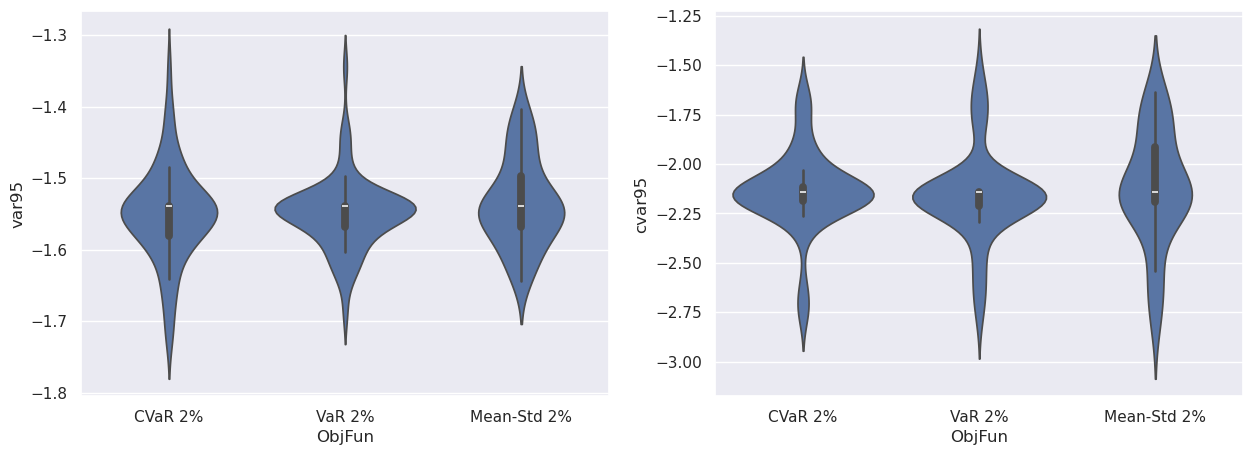

<Axes: xlabel='ObjFun', ylabel='Mean-SD'>

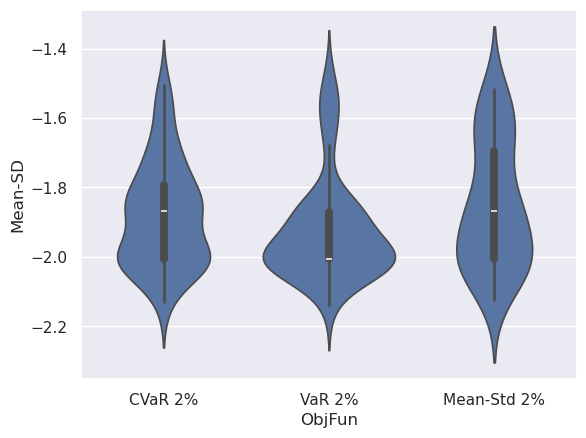

In [46]:
import seaborn as sns

# 2 column figure
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.violinplot(x='ObjFun', y='var95', data=df, ax=ax[0])
sns.violinplot(x='ObjFun', y='cvar95', data=df, ax=ax[1])
plt.show()

sns.violinplot(x='ObjFun', y='Mean-SD', data=df)

# Guide to Interpreting Statistical Analysis Results

This guide will help you understand and interpret the results generated by the `analyze_obj_function` Python function. The function performs a series of statistical tests to compare different objective functions and visualizes the data distribution using a violin plot.

* * *

## **1. Overview of the Analysis Process**

The `analyze_obj_function` function performs the following steps:

1. **Data Selection:** Filters the top 50% of data based on the median (if `best=True`).
2. **Normality Check:** Uses the Shapiro-Wilk test to assess if each group follows a normal distribution.
3. **Homogeneity of Variances:** Applies Levene's Test to check if variances across groups are equal.
4. **Statistical Testing:** Depending on normality and variance homogeneity:
    * **ANOVA** and **Tukey's HSD** for normally distributed data with equal variances.
    * **Welch's ANOVA** and **Games-Howell** for normally distributed data with unequal variances.
    * **Kruskal-Wallis** and **Dunn's Test** for non-normally distributed data.
5. **Visualization:** Generates a violin plot to visualize data distribution across groups.

* * *

## **2. Interpreting the Results**

### **A. Shapiro-Wilk Test for Normality**

**Purpose:** Determines if each group's data is normally distributed.

**Output Example:**

```yaml
Shapiro-Wilk Test for Normality:
  Group: Mean-Std 2%, p-value: 0.0058
  Group: VaR 2%, p-value: 0.3134
  Group: CVaR 2%, p-value: 0.0000
```

**Interpretation:**

* **p-value < 0.05:** Data **does not** follow a normal distribution.
* **p-value > 0.05:** Data **follows** a normal distribution.

**Example Interpretation:**

* "Mean-Std 2%" and "CVaR 2%" groups are **not** normally distributed.
* "VaR 2%" group **is** normally distributed.

* * *

### **B. Levene's Test for Homogeneity of Variances**

**Purpose:** Checks if different groups have equal variances.

**Output Example:**

```rust
Levene's Test for Homogeneity of Variances p-value: 0.4455
```

**Interpretation:**

* **p-value < 0.05:** Variances are **not** equal across groups.
* **p-value > 0.05:** Variances are **equal** across groups.

**Example Interpretation:**

* With a p-value of 0.4455, we conclude that variances are **equal** across groups.

* * *

### **C. Selecting the Appropriate Statistical Test**

Based on the results from the Shapiro-Wilk and Levene's tests:

1. **All Groups Normal & Equal Variances:**
    * **Use:** ANOVA and Tukey's HSD
2. **All Groups Normal but Unequal Variances:**
    * **Use:** Welch's ANOVA and Games-Howell
3. **Any Group Non-Normal:**
    * **Use:** Kruskal-Wallis and Dunn's Test

**Example Scenario:**

* Since two groups are non-normal, the function uses **Kruskal-Wallis** and **Dunn's Test**.

* * *

### **D. Kruskal-Wallis Test**

**Purpose:** Non-parametric test to determine if there are statistically significant differences between the medians of three or more groups.

**Output Example:**

```css
Kruskal-Wallis Test p-value: 0.2776
```

**Interpretation:**

* **p-value < 0.05:** Significant differences exist between group medians.
* **p-value > 0.05:** No significant differences between group medians.

**Example Interpretation:**

* With a p-value of 0.2776, there are **no significant differences** in medians across groups.

* * *

### **E. Dunn's Post-hoc Test**

**Purpose:** Identifies which specific groups differ after a significant Kruskal-Wallis test.

**Output Example:**

```less
Dunn's Post-hoc Test:
              CVaR 2%  Mean-Std 2%    VaR 2%
CVaR 2%      1.000000     0.424357  0.930732
Mean-Std 2%  0.424357     1.000000  1.000000
VaR 2%       0.930732     1.000000  1.000000
```

**Interpretation:**

* **Values < 0.05:** Significant difference between the pair of groups.
* **Values ≥ 0.05:** No significant difference.

**Example Interpretation:**

* All p-values are **greater than 0.05**, indicating **no significant differences** between any pairs of groups.

* * *

### **F. Violin Plot Interpretation**

**Purpose:** Visualizes the distribution of the target variable across different groups.

**Key Features:**

* **Shape:** Indicates data distribution.
* **Width:** Represents data density at different values.
* **Median Line:** Shows the median of each group.

**What to Look For:**

* **Overlap:** Significant overlap suggests similar distributions.
* **Spread:** Similar spreads indicate comparable variability.
* **Median Alignment:** Similar median lines reinforce the absence of significant differences.

**Example Interpretation:**

* Overlapping violins with similar median lines support the statistical finding of no significant differences between groups.

* * *

## **3. Summary of Findings**

Based on the example outputs:

1. **Normality:**
    
    * Only the "VaR 2%" group is normally distributed.
    * "Mean-Std 2%" and "CVaR 2%" groups are not normally distributed.
2. **Homogeneity of Variances:**
    
    * Variances are equal across all groups.
3. **Overall Group Differences:**
    
    * **Kruskal-Wallis Test p-value:** 0.2776 (no significant differences).
4. **Pairwise Group Differences:**
    
    * **Dunn's Test p-values:** All > 0.05 (no significant differences between any pair).
5. **Visualization:**
    
    * Violin plots show overlapping distributions with similar medians, corroborating the statistical tests.

**Conclusion:**

* There are **no statistically significant differences** in the median values of the target variable ("cvar95") across the three objective function groups.

* * *

## **4. Implications and Recommendations**

* **No Significant Differences Found:** The objective functions ("Mean-Std 2%", "VaR 2%", and "CVaR 2%") do not lead to different median outcomes for the target variable.
    
* **Data Characteristics:**
    
    * **Non-Normal Distributions:** Suggest using non-parametric tests like Kruskal-Wallis.
    * **Equal Variances:** Supports the use of tests that assume homogeneity, but normality is more critical here.
* **Further Actions:**
    
    * **Review Sample Size:** Ensure adequate power to detect meaningful differences.
    * **Explore Other Metrics:** Consider analyzing additional variables that might differentiate the groups.
    * **Data Transformation:** If interested in using parametric tests, explore transforming the data to meet normality assumptions.
    * **Consult a Statistician:** For more complex analyses or validation of methods.

* * *

## **5. Final Notes**

* **Robust Analysis:** Using medians and non-parametric tests ensures that the analysis is robust against non-normal data and outliers.
    
* **Visual Confirmation:** Always complement statistical tests with visualizations like violin plots to intuitively assess data distributions.
    
* **Comprehensive Reporting:** Consider reporting both medians and means to provide a complete picture, especially if some groups meet normality assumptions.
    

* * *

ObjFun
CVaR 2%        32
Mean-Std 2%    17
VaR 2%          9 

Shapiro-Wilk Test for Normality:
  Group: Mean-Std 2%, p-value: 0.0001
  Group: VaR 2%, p-value: 0.0530
  Group: CVaR 2%, p-value: 0.0000

Levene's Test for Homogeneity of Variances p-value: 0.9603

Kruskal-Wallis Test p-value: 0.1620

Dunn's Post-hoc Test:
              CVaR 2%  Mean-Std 2%    VaR 2%
CVaR 2%      1.000000     0.453052  0.326268
Mean-Std 2%  0.453052     1.000000  1.000000
VaR 2%       0.326268     1.000000  1.000000



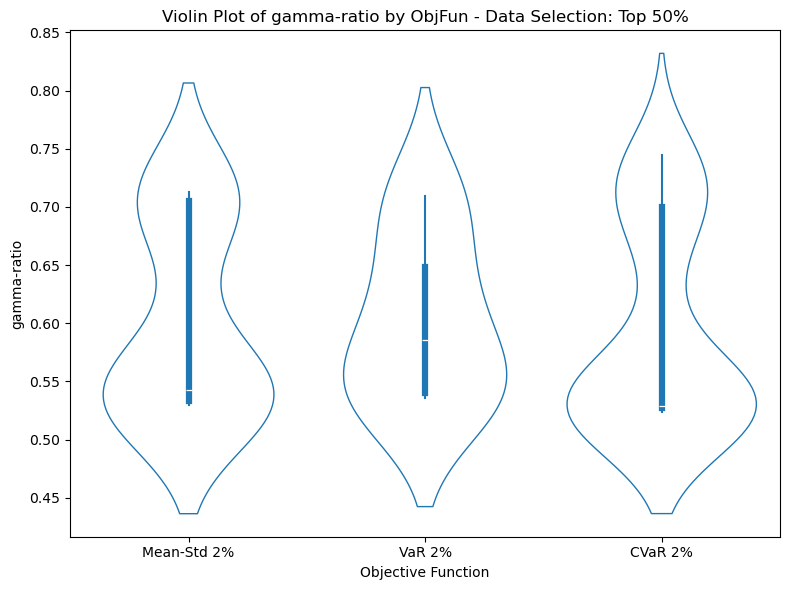

In [30]:
from importlib import reload
import pandas as pd
import mymod
reload(mymod)

from mymod import analyze_obj_function


df = pd.read_csv('obj function compare 2pct.csv')
# print(df.head())
analyze_obj_function(df, 'gamma-ratio', q=.50)

-----------------------------
# 3) Determine if more steps helps

In [1]:
import numpy as np
import pandas as pd
from polars import read_csv as pl_read_csv
import polars as pl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from tqdm import tqdm, trange
import matplotlib.lines as mlines
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

plt.style.use('dark_background')
pd.options.mode.chained_assignment = None

In [10]:
def generate_stat(folder, eval_quantiles, agent_name, return_resutls=True):

    eval_df = pl_read_csv(folder, n_threads=8).to_pandas()
    eval_loop_df = eval_df[['episode', 'step_pnl', 'hed_cost']].groupby('episode').aggregate('sum')
    eval_loop_df.columns = ['episode_return', 'tc']
    
    gamma_exposure_df = eval_df[['episode', 'gamma_before_hedge', 'gamma_after_hedge']]
    gamma_exposure_df['gamma_hedged_amount'] = (gamma_exposure_df['gamma_before_hedge'] - gamma_exposure_df['gamma_after_hedge']) * np.sign(gamma_exposure_df['gamma_before_hedge'])
    gamma_exposure_df['gamma_before_hedge_level'] = gamma_exposure_df['gamma_before_hedge'].abs()
    gamma_exposure_df = gamma_exposure_df.groupby('episode').aggregate('sum')
    gamma_exposure = gamma_exposure_df['gamma_hedged_amount'] / gamma_exposure_df['gamma_before_hedge_level']
    
    vega_exposure_df = eval_df[['episode', 'vega_before_hedge', 'vega_after_hedge']]
    vega_exposure_df['vega_hedged_amount'] = (vega_exposure_df['vega_before_hedge'] - vega_exposure_df['vega_after_hedge']) * np.sign(vega_exposure_df['vega_before_hedge'])
    vega_exposure_df['vega_before_hedge_level'] = vega_exposure_df['vega_before_hedge'].abs()
    vega_exposure_df = vega_exposure_df.groupby('episode').aggregate('sum')
    vega_exposure = vega_exposure_df['vega_hedged_amount'] / vega_exposure_df['vega_before_hedge_level']

    # Calculate BCa Bootstrap Confidence Interval for 'episode_return'
    pnl_data = eval_loop_df['episode_return'].values
    pnl_std  = eval_loop_df['episode_return'].std()
    pnl_bootstrap = bs.bootstrap(pnl_data, stat_func=bs_stats.mean, alpha=0.05, num_iterations=10000, num_threads=16)
    pnl_mean = pnl_bootstrap.value
    pnl_half_width = (pnl_bootstrap.upper_bound - pnl_bootstrap.lower_bound) / 2

    # Calculate BCa Bootstrap Confidence Interval for 'tc'
    tc_data = eval_loop_df['tc'].values
    tc_bootstrap = bs.bootstrap( tc_data, stat_func=bs_stats.mean, alpha=0.05, num_iterations=10000, num_threads=16 )
    tc_mean = tc_bootstrap.value
    tc_half_width = (tc_bootstrap.upper_bound - tc_bootstrap.lower_bound) / 2

    # Returning statistics:
    mean_std = eval_loop_df['episode_return'].mean() - 1.645 * eval_loop_df['episode_return'].std()
    gamma_ratio = gamma_exposure.mean()
    vega_ratio = vega_exposure.mean()

    stats_str = (
        f"{agent_name:<20} pnl mean: {pnl_mean:<6.2f}(±{pnl_half_width:<4.2f}) | "
        f"std: {pnl_std:<10.5f} | "
        f"Mean-SD: {mean_std:<6.2f} | "
        f"gamma-ratio: {gamma_ratio:5.2f} ({gamma_exposure.quantile(0.10):5.2f}/{gamma_exposure.quantile(0.90):5.2f}) | "
        f"vega-ratio: {vega_ratio:5.2f} ({vega_exposure.quantile(0.10):5.2f}/{vega_exposure.quantile(0.90):5.2f})"
    )
    
    for q in eval_quantiles:
        stats_str += f"| var{100 * q:.0f}: {eval_loop_df['episode_return'].quantile(1 - q):8.2f} "
    
    for q in eval_quantiles:
        cvar_value = eval_loop_df.loc[
            eval_loop_df['episode_return'] <= eval_loop_df['episode_return'].quantile(1 - q),
            'episode_return'
        ].mean()
        stats_str += f"| cvar{100 * q:.0f}: {cvar_value:8.2f} "
    
    stats_str += f"| E[TC]: {tc_mean:<6.2f}(±{tc_half_width:<4.2f})"
    
    print(stats_str)
    if return_resutls:
        # pnl mean	std	Mean-SD	gamma-ratio	vega-ratio	var95	cvar95	E[TC]
        var95  = eval_loop_df['episode_return'].quantile(1 - .95)
        cvar95 = eval_loop_df.loc[eval_loop_df['episode_return'] <= var95, 'episode_return'].mean()
        return pnl_mean , pnl_std , mean_std , gamma_ratio , vega_ratio , var95 , cvar95 , tc_mean

# Define quantiles for evaluation
eval_quantiles = [0.95]

In [3]:
path_old = '~/data/storageith2/gamma-vega-hedging-American-Heston/logs/(EXP 2) Heston Experiments/spread_2/Heston_CVaR_2/'
path_new = 'logs/(EXP 2.1) Heston Experiments/spread_2/Heston_CVaR_Batch/'

Heston Mean-Std 0.5%:2 pnl mean: -10.33(±0.40) | std: 18.40545   | Mean-SD: -40.61 | gamma-ratio:  0.21 ( 0.06/ 0.35) | vega-ratio:  0.13 ( 0.05/ 0.21)| var95:   -41.30 | cvar95:   -54.09 | E[TC]: -7.98 (±0.06)
Heston Mean-Std 0.5%:3 pnl mean: -11.96(±0.37) | std: 16.88330   | Mean-SD: -39.74 | gamma-ratio:  0.35 ( 0.18/ 0.53) | vega-ratio:  0.14 ( 0.05/ 0.27)| var95:   -41.06 | cvar95:   -52.80 | E[TC]: -10.27(±0.07)
Heston Mean-Std 0.5%:4 pnl mean: -9.24 (±0.35) | std: 16.46078   | Mean-SD: -36.32 | gamma-ratio:  0.22 ( 0.05/ 0.39) | vega-ratio:  0.16 ( 0.08/ 0.24)| var95:   -36.29 | cvar95:   -48.36 | E[TC]: -9.16 (±0.08)
Heston Mean-Std 0.5%:5 pnl mean: -6.12 (±0.38) | std: 17.93305   | Mean-SD: -35.62 | gamma-ratio:  0.16 (-0.01/ 0.36) | vega-ratio:  0.20 ( 0.10/ 0.30)| var95:   -34.37 | cvar95:   -47.85 | E[TC]: -9.85 (±0.08)
Heston Mean-Std 0.5%:6 pnl mean: -13.44(±0.41) | std: 18.84096   | Mean-SD: -44.43 | gamma-ratio:  0.18 ( 0.02/ 0.33) | vega-ratio:  0.12 ( 0.05/ 0.20)| var

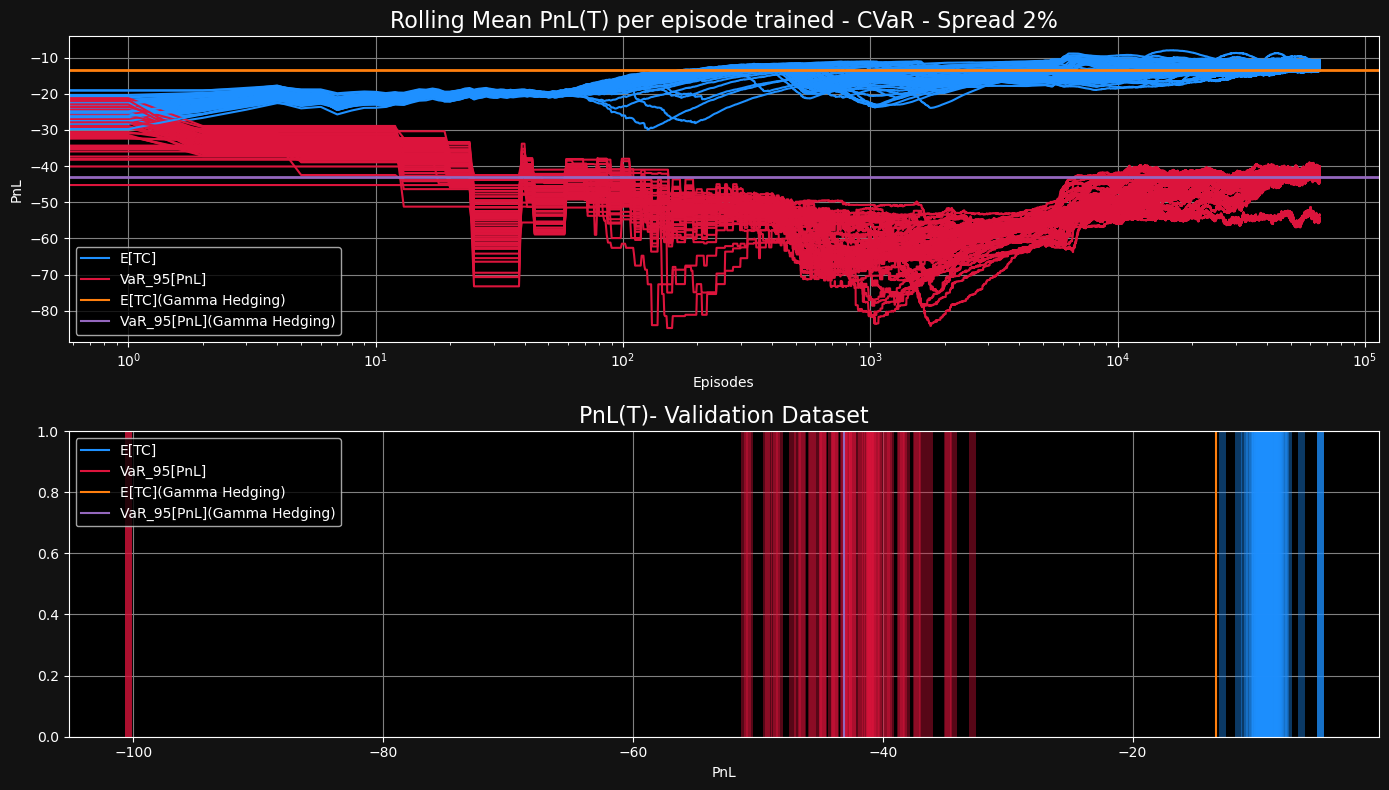

In [11]:
base_path = path_new
N_E = 64
batch_template_train = (
    "Heston_CVaR_2_{}/stochastic_process=Heston_spread=0.02_obj="
    "cvar_threshold=0.95_critic=qr-huber_hedttm=30/logs/train_env/logs.csv"
)
batch_template_eval  = (
    "Heston_CVaR_2_{}/stochastic_process=Heston_spread=0.02_obj="
    "cvar_threshold=0.95_critic=qr-huber_hedttm=30/logs/eval_env/logs.csv"
)
batch_template_eval_loop  = (
    "Heston_CVaR_2_{}/stochastic_process=Heston_spread=0.02_obj="
    "cvar_threshold=0.95_critic=qr-huber_hedttm=30/logs/eval_loop/logs.csv"
)
batch_folders_train      = [base_path + batch_template_train.format(i) for i in range(1, N_E+1)]
batch_folders_eval       = [base_path + batch_template_eval.format(i) for i in range(1, N_E+1)]
batch_folders_eval_loop  = [base_path + batch_template_eval_loop.format(i) for i in range(1, N_E+1)]

plt.style.use('dark_background')
fig, (ax1,ax2) = plt.subplots(nrows=2, figsize=(14, 8))

results_cvar2_old = {}
for i in range(2, N_E):
    # print(batch_folders_train[i])
    df = (
        pl_read_csv(batch_folders_train[i], n_threads=16)
        .select(pl.col('episode'), pl.col('t'), pl.col('step_pnl'), pl.col('hed_cost'))
        .sort(['episode', 't'])
        .group_by('episode').agg(
            pl.col('step_pnl').sum().alias('step_pnl_sum'),
            pl.col('hed_cost').sum().alias('hed_cost_sum')
        )
        .with_columns([
            pl.col("hed_cost_sum").rolling_mean(
                window_size=5_000, min_periods=0
            ).alias("mean_hc"),
            pl.col("step_pnl_sum").rolling_quantile(
                quantile=0.05, window_size=5_000, min_periods=0
            ).alias("CVaR_95"),
        ])
        .to_pandas()
    )
    ax1.plot(df['episode'], df['mean_hc'], color='dodgerblue')
    ax1.plot(df['episode'], df['CVaR_95'], color='crimson')

    df = (
        pl_read_csv(batch_folders_eval[i], n_threads=16)
        .group_by('episode').agg(
            pl.col('step_pnl').sum().alias('step_pnl_sum'),
            pl.col('hed_cost').sum().alias('hed_cost_sum')
        )
        #mean hc and VaR 95 PnL
        .with_columns([
            pl.col("hed_cost_sum").mean().alias("mean_hc"),
            pl.col("step_pnl_sum").quantile(0.05).alias("VaR_95"),
        ])
        .to_pandas()
    )
    ax2.axvline(x=df['mean_hc'].values[0], color='dodgerblue', label='mean_hc', linewidth=5, alpha=.4)
    ax2.axvline(x=df['VaR_95'].values[0], color='crimson', label='VaR_95', linewidth=5, alpha=.4)
    
    results_cvar2_old[i] = generate_stat(batch_folders_eval[i],    eval_quantiles, f'Heston Mean-Std 0.5%:{i}')


# Ploting
ax1.set_title("Rolling Mean PnL(T) per episode trained - CVaR - Spread 2%", color='white', fontsize=16)
ax1.set_xlabel("Episodes", color='white')
ax1.set_ylabel("PnL", color='white')
ax1.set_xscale('log')
ax1.grid(True, color='gray')
ax1.tick_params(colors='white')
ax1.legend(['E[TC]', 'VaR_95[PnL]'], loc='upper left')

ax2.set_title("PnL(T)- Validation Dataset", color='white', fontsize=16)
ax2.set_xlabel("PnL", color='white')
ax2.grid(True, color='gray')
ax2.tick_params(colors='white')

gamma_path = "/home/atsoskouno/data/storageith2/gamma-vega-hedging-American-Heston/logs/(EXP 2) Heston Experiments/spread_2/Heston_Gamma_2/greekhedge_stochastic_process=Heston_spread=0.02_hedttm=30/logs/eval_env/logs.csv"
# Gamma Hedge
df = (
        pl_read_csv(gamma_path)\
        .group_by('episode').agg(
            pl.col('step_pnl').sum().alias('step_pnl_sum'),
            pl.col('hed_cost').sum().alias('hed_cost_sum')
        )
        .with_columns([
            pl.col("hed_cost_sum").mean().alias("mean_hc"),
            pl.col("step_pnl_sum").quantile(0.05).alias("VaR_95"),
        ])
        .to_pandas()
    )
ax1.axhline(y=df['mean_hc'].mean(), color='tab:orange', label='mean_hc', linewidth=2)
ax1.axhline(y=df['VaR_95'].mean(), color='tab:purple', label='VaR_95', linewidth=2)
ax2.axvline(x=df['mean_hc'].mean(), color='tab:orange', label='mean_hc')
ax2.axvline(x=df['VaR_95'].mean(), color='tab:purple', label='VaR_95')
custom_lines = [mlines.Line2D([], [], color=color, label=label) for color, label in 
                zip(['dodgerblue', 'crimson', 'tab:orange', 'tab:purple'],
                    ['E[TC]', 'VaR_95[PnL]', 'E[TC](Gamma Hedging)', 'VaR_95[PnL](Gamma Hedging)'])]
ax1.legend(handles=custom_lines, loc='best')
ax2.legend(handles=custom_lines, loc='best')

generate_stat(gamma_path,    eval_quantiles, f'Gamma 0.5%')

fig.patch.set_facecolor('#121212')
plt.tight_layout()
plt.show()

In [ ]:
df1 = pd.DataFrame.from_dict(results_cvar2_old, orient='index' , columns=['pnl mean',	'std', 'Mean-SD', 'gamma-ratio' , 'vega-ratio', 'var95', 'cvar95', 'E[TC]'])
df1['ObjFun'] = 'CVaR 2%'
df1.set_index('ObjFun', inplace=True)
df1.sort_values('cvar95', ascending=False)

# pnl mean	    std	        Mean-SD	    gamma-ratio	        vega-ratio	        var95	    cvar95	    E[TC]
# New:
#-8.533441	    15.981827	-34.823547	0.251978	        0.160595	        -34.779595	-45.149756	-9.370691
# Old:
#-8.93 (±0.51)  16.93       -36.77      0.24 (-0.01/0.46)   0.19 (0.06/0.29)    -36.90      -49.24      -9.84 (±0.12)

,pnl mean,std,Mean-SD,gamma-ratio,vega-ratio,var95,cvar95,E[TC]
ObjFun,,,,,,,,
CVaR 2%,-8.533441,15.981827,-34.823547,0.251978,0.160595,-34.779595,-45.149756,-9.370691
CVaR 2%,-7.724155,16.439814,-34.767648,0.220546,0.127541,-34.864592,-46.468462,-8.283719
CVaR 2%,-6.117552,17.933051,-35.617421,0.164398,0.197292,-34.366365,-47.848282,-9.848468
CVaR 2%,-9.244821,16.460779,-36.322803,0.218309,0.155815,-36.291599,-48.364714,-9.158302
CVaR 2%,-9.921073,16.573284,-37.184125,0.184818,0.220376,-36.869963,-48.464158,-10.692672
...,...,...,...,...,...,...,...,...
CVaR 2%,-16.886358,19.712781,-49.313883,0.125540,0.147734,-50.698980,-63.533078,-8.773278
CVaR 2%,-15.621843,20.760697,-49.773190,0.140298,0.131769,-51.077439,-63.574851,-8.421269
CVaR 2%,-30.073344,39.605431,-95.224278,-0.037010,0.136374,-100.481880,-130.514005,-5.020271
